## Яндекс Недвижимость

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель**:

выявить закономерности между показателями в предоставленных данных


**План**:

    -Изучить данные
    -Выявить и устранить пропуски в данных, где это возможно
    -Обнаружить и устранить явные и неявние дубликаты
    -Изучить и изменить типы данных, где необходимо
    -Выявить и устранить аномалии
    -Добавить новые данные для дальнейшего исследования
    -Изучить параметры объектов, скорость продажи и параметры, влияющие на стоимость
    -Выявить населенные пункты с самой высокой и самой низкой ценой за квардратный метр
    -Определить среднюю цену километра при удалении от центра города, выявить наличие закономерности

**Описание данных**

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import dedent
from IPython import get_ipython
import seaborn as sns
import pylab as pl
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.head(8)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

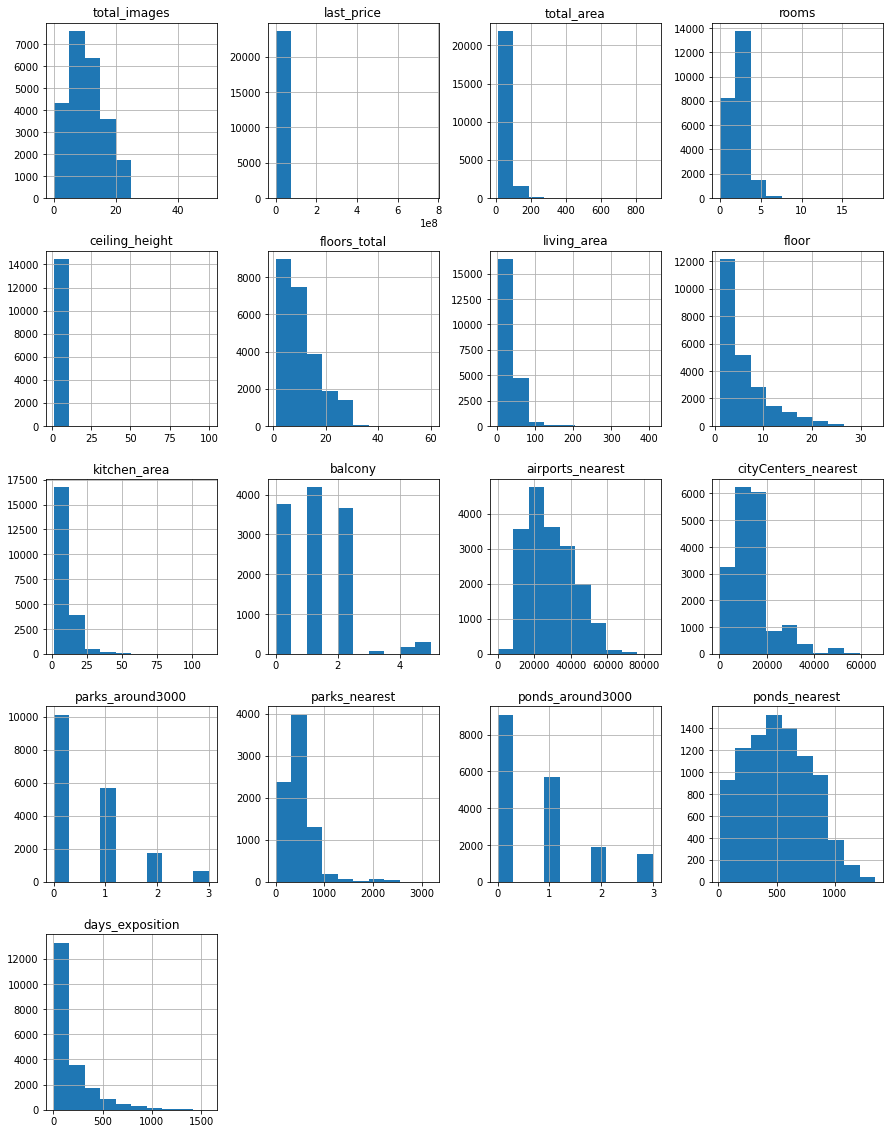

In [5]:
df.hist(figsize=(15, 20))

In [6]:
df.duplicated().sum()

0

Размер датафрейма: 23699 rows x 22 columns. 
Пропуски данных присутствуют в столбцах: 'ceiling_height', 'floors_total', 'living_area','is_apartment', 
'kitchen_area', 'balcony','locality_name', 'airports_nearest', 'cityCenters_nearest','parks_around3000', 
'parks_nearest', 'ponds_around3000',  'ponds_nearest', 'days_exposition'.Явные дубликаты проверены.

### Предобработка данных

In [7]:
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [8]:
df.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [9]:
def investigate_column(column):
    print('Null or Na count is', column.isna().sum())
    print(column.describe())
#print(sorted(column.unique()))

**1. Высота потолков**

In [10]:
investigate_column(df['ceiling_height'])

Null or Na count is 9195
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


In [11]:
ceiling_max = df.query('ceiling_height>5')
ceiling_max['ceiling_height'].value_counts()

27.0     8
25.0     7
8.0      3
5.3      2
32.0     2
14.0     1
5.2      1
6.0      1
8.3      1
5.6      1
5.8      1
10.3     1
5.5      1
20.0     1
26.0     1
22.6     1
27.5     1
24.0     1
100.0    1
Name: ceiling_height, dtype: int64

In [12]:
df = df.where(df['ceiling_height']!='27.0',2.7)
df = df.where(df['ceiling_height']!='25.0',2.5)
df = df.where(df['ceiling_height']!='32.0',3.2)
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df = df.query('2.4 <= ceiling_height <= 5')

Примем за нормальные значения высоту потолков от 2,4 до 5 метров, исправим значения 27, 25 и 32 на 2.7, 2.5 и 3.2, остальные
значения удалим, так как это единичные аномалии.

**2.Количество этажей**

In [13]:
investigate_column(df['floors_total'])

Null or Na count is 86
count    23556.000000
mean        10.678299
std          6.594016
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [14]:
df['floors_total'].value_counts()

5.0     5764
9.0     3757
16.0    1373
12.0    1360
4.0     1199
10.0    1173
25.0    1074
6.0      912
17.0     831
3.0      666
7.0      591
14.0     551
18.0     504
24.0     468
8.0      389
2.0      378
15.0     364
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
35.0      24
1.0       24
28.0      21
36.0       2
29.0       1
60.0       1
52.0       1
34.0       1
33.0       1
Name: floors_total, dtype: int64

In [15]:
df = df.query('floors_total <= 37')
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

Самый высокий жилой дом в Санкт-Петербурге - ЖК "Александр Невский", его высота - 37 этажей, остальные данные будем считать аномальными.

**3.Жилая площадь**

Если жилая площадь не указана,то мы никак не можем ее ни усреднить, ни спрогнозировать, поэтому пропуски в данном столбце оставляем без изменений.

**4.Апартаменты**

Если данные в этом столбце не указаны, то скорее всего это не апартаменты, заполняем пропуски значением False. Меняем тип данных с object на bool.

In [16]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [17]:
df['is_apartment'].unique()

array([False,  True])

In [18]:
df['is_apartment'] = df['is_apartment'].astype(bool)

**5.Площадь кухни**

Заменим пропуски на 0 в строках, где жилье являемся аппартаментами.

In [19]:
df['kitchen_area']= df['kitchen_area'][df['is_apartment']!=True].fillna(0)

**6.Балконы**

Если они не заполнены, то скорее всего их нет. Меняем пустые значения на 0.

In [20]:
df['balcony'] = df['balcony'].fillna(0)

**7. Расположение**

Удаляем неявные дубликаты в названии местоположения. Пропуски мы заполнить не можем, поэтому оставляем, как есть.

In [21]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [22]:
duplicates = ['поселок городского типа ','городской поселок ', 'поселок ', 'деревня ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ', 'деревня ', 'коттеджный поселок ', 'при железнодорожной ' 'коттеджный ']
for d in duplicates:
    df['locality_name'] = df['locality_name'].str.replace(d, '')

In [23]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

**8.Расстояние до аэропорта, центра, пруда или парка**

Эти данные невозможно установить, оставляем без изменений

**9. Парки и пруды в радиусе 3000м**

Если они не указаны, значит, скорее всего, их нет. Заполняем нулями.

In [24]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

**10. Дни экспозиции**

In [25]:
investigate_column(df['days_exposition'])

Null or Na count is 3161
count    20393.000000
mean       180.928652
std        219.781181
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


Можно предположить, что объявление еще не закрылось и квартира находится в продаже. Желательно уточнить у разработчика.

In [26]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area               47
balcony                     0
locality_name              48
airports_nearest         5507
cityCenters_nearest      5484
parks_around3000            0
parks_nearest           15530
ponds_around3000            0
ponds_nearest           14514
days_exposition          3161
dtype: int64

***Поиск и удаление аномальных значений***

In [27]:
investigate_column(df['rooms'])

Null or Na count is 0
count    23554.000000
mean         2.071198
std          1.078139
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [28]:
sorted(df['rooms'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]

In [29]:
print(df.query('rooms>10').pivot_table(index='rooms',values='total_area',aggfunc=['count','sum']))

           count        sum
      total_area total_area
rooms                      
11             2      377.8
12             1      900.0
14             2      608.4
15             1      590.0
16             1      270.0
19             1      374.6


In [30]:
df = df.query('rooms<10 and total_area<=200')

Удалим аномальные данные, где количество комнат больше 10, так как они выбиваются из общей картины и по площади и по стоимости. Так же сократим площадь до 200 кв м

In [31]:
pd.options.display.float_format ='{:,.2f}'.format
investigate_column(df['last_price'])

Null or Na count is 0
count        23,329.00
mean      6,021,310.10
std       6,199,419.83
min          12,190.00
25%       3,400,000.00
50%       4,600,000.00
75%       6,700,000.00
max     330,000,000.00
Name: last_price, dtype: float64


Text(0, 0.5, 'frequency')

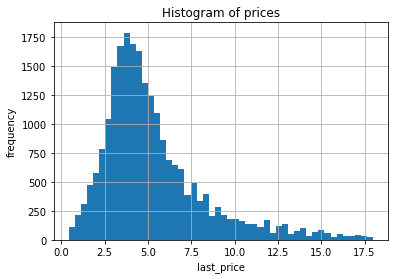

In [32]:
df = df.query('last_price <18000000')
df.loc[8793,'last_price']=df.loc[8793,'last_price']*1000
df['million_price'] = df['last_price']/1000000
df['million_price'].hist(bins=50)
pl.title("Histogram of prices")
pl.xlabel('last_price')
pl.ylabel('frequency')

Отрежем аномально дорогие квартиры и поделим стоимость на 1 миллион для удобства чтения графиков, а так же скорректируем стоимость аномально дешевой квартиры (12,190.00), скорее всего здесь указана цена в миллионах.

In [33]:
df.query('rooms<1').pivot_table(index='is_apartment',values=['total_area','living_area'],aggfunc=['count','mean','min','max'])

count                   mean                    min  \
             living_area total_area living_area total_area living_area   
is_apartment                                                             
False                181        191       18.60      27.34        2.00   

                                max             
             total_area living_area total_area  
is_apartment                                    
False             15.50       60.50      98.40

In [34]:
df = df.query('living_area>10')

rooms=[0]

for r in rooms:
    df['rooms'] = df['rooms'].replace(r, 1)

In [35]:
df = df.query('rooms<=5')

В количестве комнат выявлены аномальные значения, где комнат 0. Удалим аномальные значения, где жилая площадь меньше 10, а в остальных такиз квартирах заменим количество комнат на 1. Так же отрежем квартиры, где больше 5 комнат

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20795 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20795 non-null  int64  
 1   last_price            20795 non-null  float64
 2   total_area            20795 non-null  float64
 3   first_day_exposition  20795 non-null  object 
 4   rooms                 20795 non-null  int64  
 5   ceiling_height        20795 non-null  float64
 6   floors_total          20795 non-null  float64
 7   living_area           20795 non-null  float64
 8   floor                 20795 non-null  int64  
 9   is_apartment          20795 non-null  bool   
 10  studio                20795 non-null  bool   
 11  open_plan             20795 non-null  bool   
 12  kitchen_area          20762 non-null  float64
 13  balcony               20795 non-null  float64
 14  locality_name         20753 non-null  object 
 15  airports_nearest   

После обработки данных получили датафрейм из 20795 строк, до чистки было 23699. Очищено 12% данных

### Посчитайте и добавьте в таблицу новые столбцы

Добавляем в таблицу новые столбцы со следующими параметрами:
цена одного квадратного метра;
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «‎первый», «последний», «другой»);
расстояние до центра города в кило,  км и енноеуглите до целых знчений).

In [37]:
df['metr_price'] = df['last_price']/df['total_area']

In [38]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Поменяем тип данных floors_total для того, чтобы получить возможность сравнивать его со столбцом floor и категоризируем данные по этажам:

In [39]:
df['floors_total'] = df['floors_total'].astype(int)

In [40]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [41]:
df['floor_type'] = df.apply(floor_type,axis=1)

In [42]:
df['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [43]:
df['center_dist'] = (df['cityCenters_nearest']/1000).round()

### Проведите исследовательский анализ данных

Изучите следующие параметры объектов:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.
Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.
Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.
Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'}

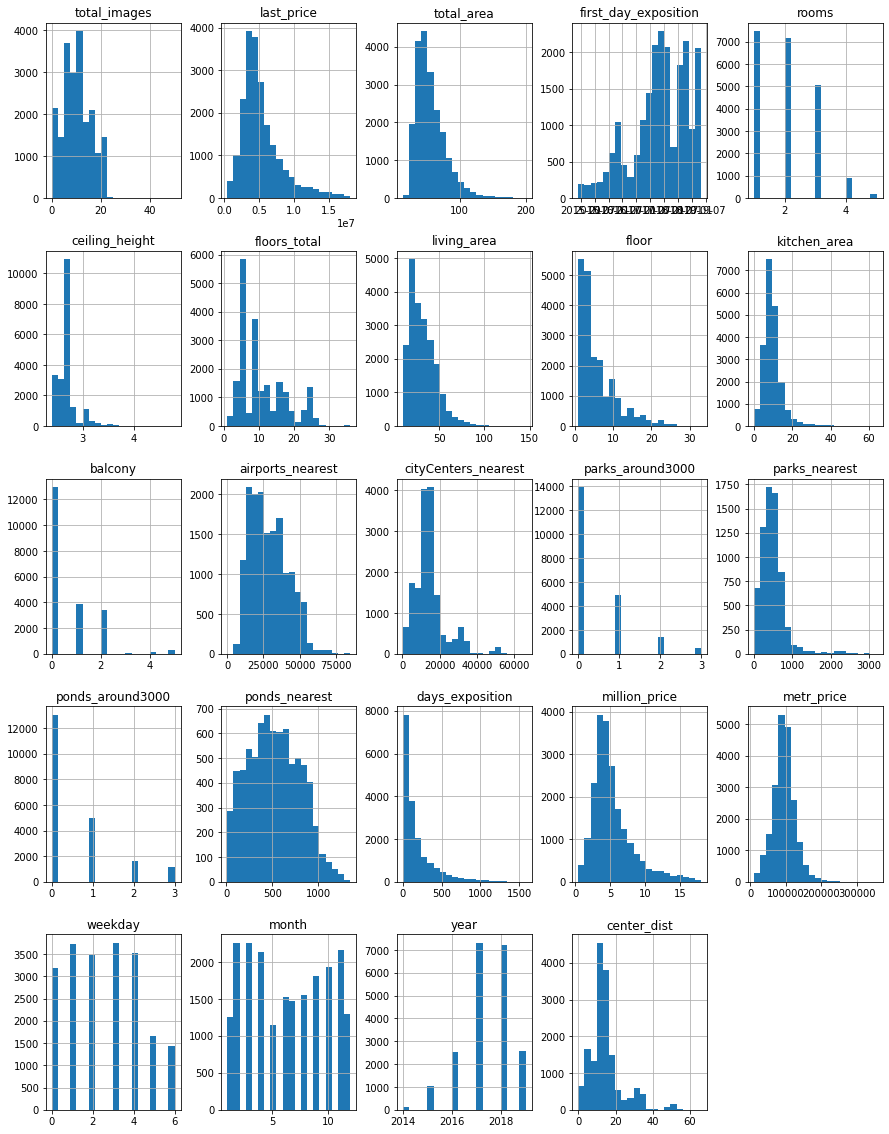

In [44]:
df.hist(figsize=(15, 20), bins=20)

In [45]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,million_price,metr_price,weekday,month,year,center_dist
count,"20,795.00","20,795.00","20,795.00","20,795.00","20,795.00","20,795.00","20,795.00","20,795.00","20,762.00","20,795.00","15,936.00","15,951.00","20,795.00","6,839.00","20,795.00","7,748.00","18,072.00","20,795.00","20,795.00","20,795.00","20,795.00","20,795.00","15,951.00"
mean,9.93,"5,309,567.62",55.77,2.00,2.68,10.73,31.99,5.88,9.60,0.62,"28,839.61","14,612.54",0.44,491.34,0.56,527.04,181.42,5.31,"94,673.11",2.55,6.42,"2,017.36",14.61
std,5.60,"2,942,331.29",22.26,0.93,0.20,6.59,15.16,4.88,4.76,0.96,"12,840.27","8,624.34",0.72,337.05,0.86,276.78,217.86,2.94,"31,293.56",1.78,3.46,1.04,8.63
min,0.00,"430,000.00",14.00,1.00,2.40,1.00,10.08,1.00,0.00,0.00,0.00,208.00,0.00,1.00,0.00,13.00,1.00,0.43,"9,615.38",0.00,1.00,"2,014.00",0.00
25%,6.00,"3,400,000.00",39.70,1.00,2.60,5.00,18.50,2.00,7.00,0.00,"18,308.75","10,039.50",0.00,289.00,0.00,307.00,44.00,3.40,"76,434.95",1.00,3.00,"2,017.00",10.00
50%,10.00,"4,550,000.00",50.70,2.00,2.65,9.00,30.00,4.00,9.00,0.00,"26,873.50","13,330.00",0.00,456.00,0.00,515.00,99.00,4.55,"94,117.65",2.00,6.00,"2,017.00",13.00
75%,14.00,"6,400,000.00",66.60,3.00,2.70,16.00,41.00,8.00,11.10,1.00,"37,434.00","16,462.50",1.00,613.00,1.00,737.00,233.00,6.40,"111,732.59",4.00,10.00,"2,018.00",16.00
max,50.00,"17,998,000.00",200.00,5.00,4.80,36.00,145.40,33.00,64.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00",18.00,"355,555.56",6.00,12.00,"2,019.00",66.00


Общая площадь: в основном продаются квартиры площадью до 100 кв м, преимуществнно 40-45 кв м. Самая маленькая квартира площадью 14кв м продается в Санкт-Петербурге, самая большая - 900 кв м, но мы удалили ее, чтобы избежать искажения данных.

Жилая площадь в среднем 50 кв м, в основном это 30 кв м

Площадь кухни: кухни либо отсутствуют вообще (в студиях), либо их основная площадь находится в пределах значений 6-12 кв м, с среднем 9кв м

Цена объекта: после удаления аномальных значений стоимость выставленных на продажу квартир составила от 430 тыс до 18 млн руб, медианное значение - 4550000 руб.

Количество комнат: основная масса продаваемых квартир - 1-2х комнатные

Высота потолков: средняя высота потолков 2,68, медиана -2,65

Этаж квартиры: в продаже квартиры с 1 по 33, преимущественно с 1 по 5й этажи, медианное значение -4

Тип этажа квартиры («первый», «последний», «другой»): квартир на последних этажах немного больше, чем на первых, но в преимущества - "другой"

Общее количество этажей в доме: в продаже квартиры в домах от 1 до 36 этажных, но с большим отрывом идут пятиэтажки

Расстояние до центра города в метрах: 12-15 км в большинстве

Расстояние до ближайшего аэропорта: 20-30 км

Расстояние до ближайшего парка: 400-500м

День и месяц публикации объявления: чаще всего публикуют по вторникам и четвергам, по месяцам - в феврале и марте.




**Как быстро продавались квартиры** 

Null or Na count is 2723
count   18,072.00
mean       181.42
std        217.86
min          1.00
25%         44.00
50%         99.00
75%        233.00
max      1,580.00
Name: days_exposition, dtype: float64


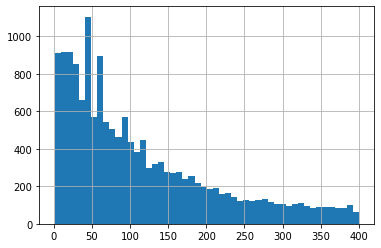

In [46]:
df['days_exposition'].hist(bins=50,range=(1,400))
investigate_column(df['days_exposition'])
#,range=(10,20)

Необычно долгие продажи длились свыше 1000 дней, самая долгая продажа длилась 1580 дней, самая быстрая - 1 день. Основная масса объявлений закрывается за 40-50 дней (см гистограмму). Медиана = 99,  среднее значение = 181, это обусловлено аномально долгими продажами дольше 1000 дней, но таких квартира достаточно много (226), поэтому их не удаляем.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта**
 Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

<AxesSubplot:xlabel='floor_type'>

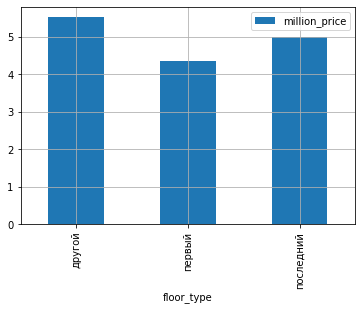

In [47]:
df.pivot_table(index='floor_type', values = 'million_price').plot(kind='bar', grid=True)

<AxesSubplot:xlabel='year'>

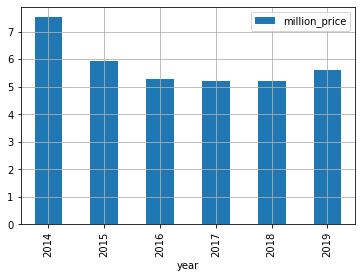

In [48]:
df.pivot_table(index='year', values = 'million_price').plot(kind='bar', grid=True)

<AxesSubplot:xlabel='rooms'>

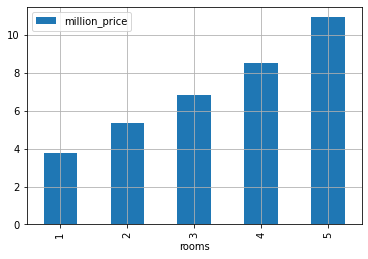

In [49]:
df.pivot_table(index='rooms', values = 'million_price').plot(kind='bar', grid=True)

In [50]:
df_corr = df[['million_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'weekday','month', 'year']]
print(df_corr.corr())

               million_price  total_area  living_area  kitchen_area  rooms  \
million_price           1.00        0.77         0.65          0.53   0.49   
total_area              0.77        1.00         0.92          0.50   0.80   
living_area             0.65        0.92         1.00          0.25   0.88   
kitchen_area            0.53        0.50         0.25          1.00   0.15   
rooms                   0.49        0.80         0.88          0.15   1.00   
weekday                -0.02       -0.02        -0.01         -0.02  -0.00   
month                   0.00        0.00        -0.00          0.01  -0.00   
year                   -0.02       -0.08        -0.06         -0.04  -0.04   

               weekday  month  year  
million_price    -0.02   0.00 -0.02  
total_area       -0.02   0.00 -0.08  
living_area      -0.01  -0.00 -0.06  
kitchen_area     -0.02   0.01 -0.04  
rooms            -0.00  -0.00 -0.04  
weekday           1.00   0.01 -0.01  
month             0.01   1.00 -

array([[<AxesSubplot:xlabel='million_price', ylabel='million_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='million_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='million_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='million_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='million_price'>,
        <AxesSubplot:xlabel='weekday', ylabel='million_price'>,
        <AxesSubplot:xlabel='month', ylabel='million_price'>,
        <AxesSubplot:xlabel='year', ylabel='million_price'>],
       [<AxesSubplot:xlabel='million_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='weekday', ylabel='total_area'>,
        <AxesSubplot:xlabel='month', ylabel='total_area'>,
        <AxesSubplot:xlabel='year',

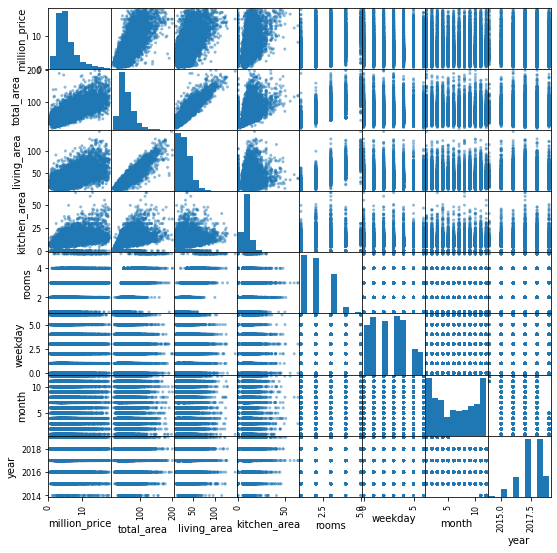

In [51]:
pd.plotting.scatter_matrix(df_corr,figsize=(9, 9))

На матрице и графиках видна прямая корреляция между стоимостью стоимостью квартиры и общей и жилой плошадями. Менее выраженная прямая корреляция с площадью кухни и количеством комнат. Самые дешевые квартиры расположены на 1х этажах, дороже всех те, которые ни на первом, ни на последнем. Наиболее высокие цены были в 2014 году. День недели и месяц на стоимость никак не влияют.

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**


In [82]:
df_locality = df.pivot_table(index='locality_name', values = 'metr_price', aggfunc=['count','median'])
df_locality.columns = ['count','median_metr_price']
df_locality = df_locality.sort_values(by='count', ascending=False)
print(df_locality_top.head(10))


                 count  median_metr_price
locality_name                            
Санкт-Петербург  13655         103,125.00
Мурино             518          86,739.88
Кудрово            420          96,086.28
Шушары             402          77,355.72
Всеволожск         369          65,789.47
Пушкин             334          99,865.71
Колпино            327          74,722.22
Парголово          301          91,642.86
Гатчина            291          67,796.61
Петергоф           195          81,944.44


Самая высокая стоимость квадратного метра из топ 10 объявлений - 103125 руб. в Санкт-Петербурге
Самая низкая стоимость - 81944 руб. в Петергофе

**Средняя цена километра. Как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге**

In [54]:
df['price_km'] = df['metr_price']/df['cityCenters_nearest']

       cityCenters_nearest  price_km
1182                208.00    829.90
8614                215.00    511.16
1934                287.00    309.39
20873               291.00    348.18
22036               329.00    303.95
8677                376.00    366.37
8239                387.00    360.00
17078               392.00    511.09
2609                399.00    225.56
12556               423.00    260.89


<AxesSubplot:xlabel='price_km'>

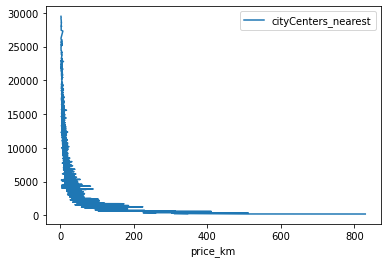

In [55]:
centr_price = df.query('locality_name=="Санкт-Петербург"')
centr_price = centr_price[['cityCenters_nearest','price_km']].copy().sort_values(by='cityCenters_nearest')
print(centr_price.head(10))
#pd.plotting.scatter_matrix(centr_price,figsize=(9, 9))
centr_price.plot(x='price_km',y='cityCenters_nearest')

Чем ближе к центру находится квартира, тем выше цена квадратного метра.

### Общий вывод

**Результат работы:**


    -Изучены данные
    -Выявлены и устранены пропуски в данных, где это возможно
    -Обнаружены и устранены явные и неявние дубликаты
    -Изучены и изменены типы данных, где необходимо
    -Выявлены и устранены аномалии (12% исходных данных)
    -Добавлены новые данные столбцы для дальнейшего исследования
    -Изучены параметры объектов, скорость продажи и параметры, влияющие на стоимость
    -Выявлены населенные пункты с самой высокой и низкой ценой за квардратный метр из топ-10 объявлений:
    103125 руб. в Санкт-Петербурге и 81945 руб. в Петергофе.
    -Определена средняя цена километра при удалении от центра города, выявить наличие закономерности: чем ближе к центру находится квартира, тем выше цена квадратного метра, так же и цена километра падает по мере удаления от центра города

     В процессе анализа данных была получена следующая информация:
    
    Общая площадь: в основном продаются квартиры площадью до 100 кв м, преимуществнно 40-45 кв м. Самая маленькая квартира площадью 14кв м продается в Санкт-Петербурге, самая большая - 900 кв м, но мы удалили ее, чтобы избежать искажения данных. 
    Жилая площадь в среднем 50 кв м, в основном это 30 кв м
    Площадь кухни: кухни либо отсутствуют вообще (в студиях), либо их основная площадь находится в пределах значений 6-12 кв м, с среднем 9кв м
    Цена объекта: после удаления аномальных значений стоимость выставленных на продажу квартир составила от 430 тыс до 18 млн руб, медианное значение - 4550000 руб.
    Количество комнат: основная масса продаваемых квартир - 1-2х комнатные
    Высота потолков: средняя высота потолков 2,68, медиана -2,65
    Этаж квартиры: в продаже квартиры с 1 по 33, преимущественно с 1 по 5й этажи, медианное значение-4
    Тип этажа квартиры («первый», «последний», «другой»): квартир на последних этажах немного больше, чем на первых, но в преимущества - "другой"
    Общее количество этажей в доме: в продаже квартиры в домах от 1 до 36 этажных, но с большим отрывом идут пятиэтажки
    Расстояние до центра города в метрах: 12-15 км в большинстве
    Расстояние до ближайшего аэропорта: 20-30 км
    Расстояние до ближайшего парка: 400-500м
    День и месяц публикации объявления: чаще всего публикуют по вторникам и четвергам, по месяцам - в феврале и марте.
    Портрет самой популярной в объявлениях квартиры:
    Общая площадь - 50 кв м, жилая - 30 кв м, двухкомнатная, кухня 9 кв м, стоимостью 4,55 млн в пятиэтажном доме, на 2м этаже потолки 2,65, расстояние до центра- 14км, до аэропорта 17км, близжайший парк в 400м.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод